<a href="https://colab.research.google.com/github/salsaimon/proyecto_recursoshumanos/blob/main/c_modelos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## CONEXION Y LIBRERIAS

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Librerias

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import joblib
from sklearn.model_selection import cross_validate
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
from matplotlib import pyplot
from sklearn.model_selection import RandomizedSearchCV

In [3]:
file_path = '/content/drive/MyDrive/analitica3win/proyecto_recursoshumanos/df_mergedtriple.csv'

# Leer el archivo CSV en un DataFrame
df_mergedtriple = pd.read_csv(file_path)

# Mostrar las primeras filas del DataFrame para verificar la carga correcta
print(df_mergedtriple.head())


   Age     BusinessTravel  DistanceFromHome  Education EducationField  \
0   51      Travel_Rarely                 6          2  Life Sciences   
1   51      Travel_Rarely                 6          2  Life Sciences   
2   31  Travel_Frequently                10          1  Life Sciences   
3   32  Travel_Frequently                17          4          Other   
4   32  Travel_Frequently                17          4          Other   

   EmployeeID  JobLevel MaritalStatus  MonthlyIncome  NumCompaniesWorked  ...  \
0           1         1       Married         131160                 1.0  ...   
1           1         1       Married         131160                 1.0  ...   
2           2         1        Single          41890                 0.0  ...   
3           3         4       Married         193280                 1.0  ...   
4           3         4       Married         193280                 1.0  ...   

   TrainingTimesLastYear  YearsAtCompany  YearsSinceLastPromotion  \
0    

In [4]:
df_mergedtriple.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8820 entries, 0 to 8819
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      8820 non-null   int64  
 1   BusinessTravel           8820 non-null   object 
 2   DistanceFromHome         8820 non-null   int64  
 3   Education                8820 non-null   int64  
 4   EducationField           8820 non-null   object 
 5   EmployeeID               8820 non-null   int64  
 6   JobLevel                 8820 non-null   int64  
 7   MaritalStatus            8820 non-null   object 
 8   MonthlyIncome            8820 non-null   int64  
 9   NumCompaniesWorked       8820 non-null   float64
 10  PercentSalaryHike        8820 non-null   int64  
 11  StockOptionLevel         8820 non-null   int64  
 12  TotalWorkingYears        8820 non-null   float64
 13  TrainingTimesLastYear    8820 non-null   int64  
 14  YearsAtCompany          

## TRATAMIENTO DE VARIABLES

In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Lista de variables categóricas (tanto nominales como ordinales que se convertirán en dummies)
list_cat_nominales = ['BusinessTravel', 'EducationField', 'MaritalStatus']
list_cat_ordinales = ['Education', 'JobLevel', 'StockOptionLevel']

# Variables numéricas que se estandarizarán
list_numeric = ['Age', 'DistanceFromHome', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike',
                'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
                'YearsSinceLastPromotion', 'YearsWithCurrManager',
                'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'JobInvolvement']

# Convertir variables categóricas a dummies
df_dummies = pd.get_dummies(df_mergedtriple[list_cat_nominales + list_cat_ordinales], drop_first=True)

# Convertir cualquier valor booleano en df_dummies a 0 y 1
df_dummies = df_dummies.astype(int)

# Estandarizar las variables numéricas
scaler = StandardScaler()
df_numeric_scaled = pd.DataFrame(scaler.fit_transform(df_mergedtriple[list_numeric]), columns=list_numeric)

# Añadir la variable Year al DataFrame final
df_final = pd.concat([df_numeric_scaled, df_dummies, df_mergedtriple[['EmployeeID', 'Attrition', 'Year']]], axis=1)

# Mostrar el DataFrame final listo para el modelo
df_final.head()


,Age,DistanceFromHome,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,...,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,MaritalStatus_Married,MaritalStatus_Single,EmployeeID,Attrition,Year
0,1.541369,-0.393938,1.405136,-0.678464,-1.150554,-1.322079,2.483396,-0.981014,-0.679146,-1.155935,...,1,0,0,0,0,1,0,1,0,2015
1,1.541369,-0.393938,1.405136,-0.678464,-1.150554,-1.322079,2.483396,-0.981014,-0.679146,-1.155935,...,1,0,0,0,0,1,0,1,0,2016
2,-0.648668,0.099639,-0.491661,-1.079486,2.129306,-0.678877,0.155707,-0.327893,-0.368715,-0.034520,...,1,0,0,0,0,0,1,2,1,2015
3,-0.539166,0.963398,2.725053,-0.678464,-0.057267,-0.807517,-0.620189,-0.327893,-0.679146,-0.314873,...,0,0,0,1,0,1,0,3,0,2015
4,-0.539166,0.963398,2.725053,-0.678464,-0.057267,-0.807517,-0.620189,-0.327893,-0.679146,-0.314873,...,0,0,0,1,0,1,0,3,0,2016


In [6]:
df_final.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8820 entries, 0 to 8819
Data columns (total 29 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age                               8820 non-null   float64
 1   DistanceFromHome                  8820 non-null   float64
 2   MonthlyIncome                     8820 non-null   float64
 3   NumCompaniesWorked                8820 non-null   float64
 4   PercentSalaryHike                 8820 non-null   float64
 5   TotalWorkingYears                 8820 non-null   float64
 6   TrainingTimesLastYear             8820 non-null   float64
 7   YearsAtCompany                    8820 non-null   float64
 8   YearsSinceLastPromotion           8820 non-null   float64
 9   YearsWithCurrManager              8820 non-null   float64
 10  EnvironmentSatisfaction           8820 non-null   float64
 11  JobSatisfaction                   8820 non-null   float64
 12  WorkLi

## SEPARACION BASES

In [7]:
# Dividir df_final en dos DataFrames: uno para el año 2015 y otro para 2016
df_final2015 = df_final[df_final['Year'] == 2015].copy()
df_final2016 = df_final[df_final['Year'] == 2016].copy()

# Mostrar las primeras filas de cada DataFrame para verificar
print("Datos de 2015:")
print(df_final2015.head())

print("\nDatos de 2016:")
print(df_final2016.head())


Datos de 2015:
        Age  DistanceFromHome  MonthlyIncome  NumCompaniesWorked  \
0  1.541369         -0.393938       1.405136           -0.678464   
2 -0.648668          0.099639      -0.491661           -1.079486   
3 -0.539166          0.963398       2.725053           -0.678464   
5  0.117845         -0.887515       0.386301            0.123580   
7 -0.539166          0.099639      -0.884109            0.524602   

   PercentSalaryHike  TotalWorkingYears  TrainingTimesLastYear  \
0          -1.150554          -1.322079               2.483396   
2           2.129306          -0.678877               0.155707   
3          -0.057267          -0.807517              -0.620189   
5          -1.150554           0.221606               1.707500   
7          -0.877232          -0.292956              -0.620189   

   YearsAtCompany  YearsSinceLastPromotion  YearsWithCurrManager  ...  \
0       -0.981014                -0.679146             -1.155935  ...   
2       -0.327893                

In [8]:
df_final2016


,Age,DistanceFromHome,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,...,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,MaritalStatus_Married,MaritalStatus_Single,EmployeeID,Attrition,Year
1,1.541369,-0.393938,1.405136,-0.678464,-1.150554,-1.322079,2.483396,-0.981014,-0.679146,-1.155935,...,1,0,0,0,0,1,0,1,0,2016
4,-0.539166,0.963398,2.725053,-0.678464,-0.057267,-0.807517,-0.620189,-0.327893,-0.679146,-0.314873,...,0,0,0,1,0,1,0,3,0,2016
6,0.117845,-0.887515,0.386301,0.123580,-1.150554,0.221606,1.707500,0.161947,1.493867,0.245834,...,1,0,0,0,0,1,0,4,0,2016
8,-0.539166,0.099639,-0.884109,0.524602,-0.877232,-0.292956,-0.620189,-0.164613,-0.679146,-0.034520,...,0,0,1,0,0,0,1,5,0,2016
10,0.993860,-0.147150,-0.516733,0.123580,-0.603911,2.151212,1.707500,-0.001333,1.493867,0.806541,...,1,0,0,0,0,1,0,6,0,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8811,-0.867672,-0.270544,-0.918531,-0.678464,1.582663,-0.936158,-0.620189,-0.491174,-0.679146,-0.875581,...,1,0,0,0,0,0,1,8792,0,2016
8813,-0.429664,0.223033,0.135364,0.925624,1.582663,-0.421596,-0.620189,-0.327893,-0.679146,-0.034520,...,0,1,0,0,0,1,0,8797,0,2016
8815,-0.429664,-1.010909,-0.288106,1.727668,-1.150554,0.221606,-0.620189,0.325228,-0.368715,0.806541,...,1,0,0,0,0,1,0,8799,0,2016
8817,-0.539166,1.703764,-0.857337,-1.079486,-1.150554,-0.936158,-0.620189,-0.654454,-0.368715,-0.595227,...,1,0,0,0,0,0,1,8802,0,2016


# MODELADO

In [9]:
from sklearn.model_selection import train_test_split

# Preparar datos para entrenamiento y prueba
# Filtrar datos para los años de entrenamiento y validación (2015 y 2016)
df_train_val = df_final[df_final['Year'] < 2016]
df_test = df_final[df_final['Year'] == 2016]

# Dividir los datos de entrenamiento y validación
X = df_train_val.drop(columns=['Attrition', 'Year', 'EmployeeID'])
y = df_train_val['Attrition']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Filtrar los datos de 2016 para prueba (predicción)
X_test = df_test.drop(columns=['Attrition', 'Year', 'EmployeeID'])  # Excluir EmployeeID aquí
employee_ids_test = df_test['EmployeeID']  # Guardar EmployeeID separado

# Guardar los archivos CSV
X_train.to_csv(file_path + 'X_train.csv', index=False)
y_train.to_csv(file_path + 'y_train.csv', index=False)
X_val.to_csv(file_path + 'X_val.csv', index=False)
y_val.to_csv(file_path + 'y_val.csv', index=False)
X_test.to_csv(file_path + 'X_test.csv', index=False)
employee_ids_test.to_csv(file_path + 'employee_ids_test.csv', index=False)  # Guardar EmployeeID


In [10]:
from sklearn.model_selection import train_test_split

# Separar las características (X) de la variable objetivo (y)
X = df_final2015.drop(columns=['Attrition', 'Year', 'EmployeeID'])  # Excluir las columnas no necesarias
y = df_final2015['Attrition']  # Variable objetivo

# Dividir en conjunto de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar la forma de los conjuntos de entrenamiento y prueba
print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)


Tamaño del conjunto de entrenamiento: (3528, 26)
Tamaño del conjunto de prueba: (882, 26)


Matriz de Confusión (Test):


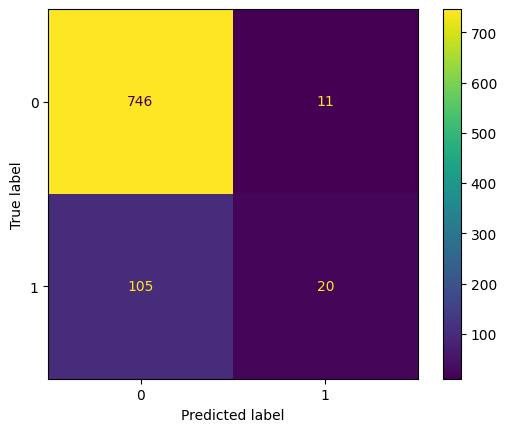


Reporte de Clasificación (Test):
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       757
           1       0.65      0.16      0.26       125

    accuracy                           0.87       882
   macro avg       0.76      0.57      0.59       882
weighted avg       0.84      0.87      0.83       882

Exactitud (Test): 0.87
Precisión (Test): 0.65
Recall (Test): 0.16
F1 Score (Test): 0.26


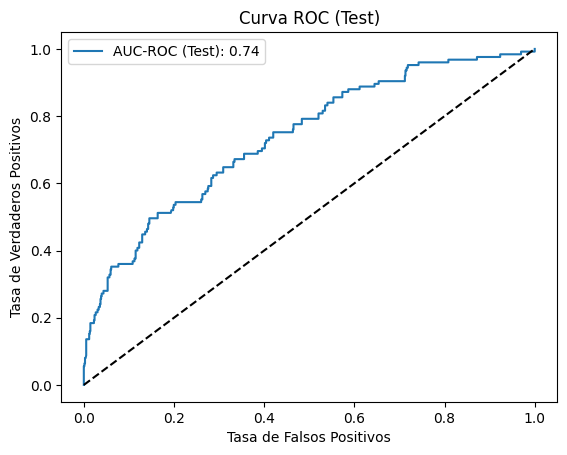


Reporte de Clasificación (Train):
              precision    recall  f1-score   support

           0       0.87      0.99      0.93      3003
           1       0.70      0.15      0.24       525

    accuracy                           0.86      3528
   macro avg       0.78      0.57      0.58      3528
weighted avg       0.84      0.86      0.82      3528

Exactitud (Train): 0.86
Precisión (Train): 0.70
Recall (Train): 0.15
F1 Score (Train): 0.24
AUC-ROC (Train): 0.79

AUC-ROC (Test): 0.74
AUC-ROC (Train): 0.79
No hay indicios significativos de sobreajuste.


In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Estandarizar las características de los conjuntos de entrenamiento y prueba
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear y entrenar el modelo de Regresión Logística
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train_scaled, y_train)

# Predicciones en el conjunto de entrenamiento y prueba
y_train_pred = logistic_model.predict(X_train_scaled)
y_test_pred = logistic_model.predict(X_test_scaled)

# Probabilidades para el cálculo de AUC-ROC
y_train_prob = logistic_model.predict_proba(X_train_scaled)[:, 1]
y_test_prob = logistic_model.predict_proba(X_test_scaled)[:, 1]

# Matriz de confusión en el conjunto de prueba
print("Matriz de Confusión (Test):")
cm_test = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test)
disp.plot()
plt.show()

# Reporte de clasificación en el conjunto de prueba
print("\nReporte de Clasificación (Test):")
print(classification_report(y_test, y_test_pred))

# Cálculo explícito de métricas en el conjunto de prueba
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)
print(f"Exactitud (Test): {accuracy_test:.2f}")
print(f"Precisión (Test): {precision_test:.2f}")
print(f"Recall (Test): {recall_test:.2f}")
print(f"F1 Score (Test): {f1_test:.2f}")

# AUC-ROC en el conjunto de prueba
roc_auc_test = roc_auc_score(y_test, y_test_prob)
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
plt.plot(fpr, tpr, label=f"AUC-ROC (Test): {roc_auc_test:.2f}")
plt.plot([0, 1], [0, 1], 'k--')  # Línea diagonal
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC (Test)')
plt.legend()
plt.show()

# Métricas de entrenamiento para detectar sobreajuste
print("\nReporte de Clasificación (Train):")
print(classification_report(y_train, y_train_pred))

# Cálculo explícito de métricas en el conjunto de entrenamiento
accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred)
recall_train = recall_score(y_train, y_train_pred)
f1_train = f1_score(y_train, y_train_pred)
print(f"Exactitud (Train): {accuracy_train:.2f}")
print(f"Precisión (Train): {precision_train:.2f}")
print(f"Recall (Train): {recall_train:.2f}")
print(f"F1 Score (Train): {f1_train:.2f}")

roc_auc_train = roc_auc_score(y_train, y_train_prob)
print(f"AUC-ROC (Train): {roc_auc_train:.2f}")

# Evaluación de sobreajuste
print(f"\nAUC-ROC (Test): {roc_auc_test:.2f}")
print(f"AUC-ROC (Train): {roc_auc_train:.2f}")

if abs(roc_auc_train - roc_auc_test) > 0.05:
    print("Posible sobreajuste detectado.")
else:
    print("No hay indicios significativos de sobreajuste.")


Matriz de Confusión (Test):


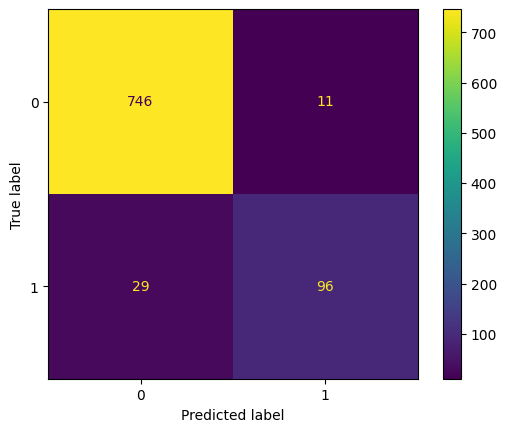


Reporte de Clasificación (Test):
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       757
           1       0.90      0.77      0.83       125

    accuracy                           0.95       882
   macro avg       0.93      0.88      0.90       882
weighted avg       0.95      0.95      0.95       882

Exactitud (Test): 0.95
Precisión (Test): 0.90
Recall (Test): 0.77
F1 Score (Test): 0.83


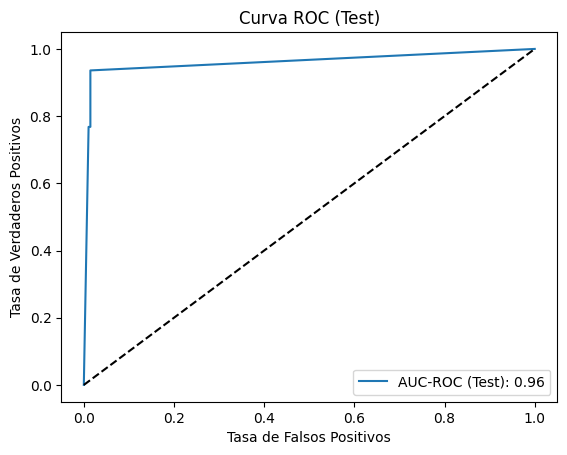


Reporte de Clasificación (Train):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3003
           1       0.95      0.95      0.95       525

    accuracy                           0.99      3528
   macro avg       0.97      0.97      0.97      3528
weighted avg       0.99      0.99      0.99      3528

Exactitud (Train): 0.99
Precisión (Train): 0.95
Recall (Train): 0.95
F1 Score (Train): 0.95
AUC-ROC (Train): 1.00

AUC-ROC (Test): 0.96
AUC-ROC (Train): 1.00
No hay indicios significativos de sobreajuste.


In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Estandarizar las características de los conjuntos de entrenamiento y prueba
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear y entrenar el modelo de Árbol de Decisión
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train_scaled, y_train)

# Predicciones en el conjunto de entrenamiento y prueba
y_train_pred_tree = tree_model.predict(X_train_scaled)
y_test_pred_tree = tree_model.predict(X_test_scaled)

# Probabilidades para el cálculo de AUC-ROC
y_train_prob_tree = tree_model.predict_proba(X_train_scaled)[:, 1]
y_test_prob_tree = tree_model.predict_proba(X_test_scaled)[:, 1]

# Matriz de confusión en el conjunto de prueba
print("Matriz de Confusión (Test):")
cm_test_tree = confusion_matrix(y_test, y_test_pred_tree)
disp_tree = ConfusionMatrixDisplay(confusion_matrix=cm_test_tree)
disp_tree.plot()
plt.show()

# Reporte de clasificación en el conjunto de prueba
print("\nReporte de Clasificación (Test):")
print(classification_report(y_test, y_test_pred_tree))

# Cálculo explícito de métricas en el conjunto de prueba
accuracy_test_tree = accuracy_score(y_test, y_test_pred_tree)
precision_test_tree = precision_score(y_test, y_test_pred_tree)
recall_test_tree = recall_score(y_test, y_test_pred_tree)
f1_test_tree = f1_score(y_test, y_test_pred_tree)
print(f"Exactitud (Test): {accuracy_test_tree:.2f}")
print(f"Precisión (Test): {precision_test_tree:.2f}")
print(f"Recall (Test): {recall_test_tree:.2f}")
print(f"F1 Score (Test): {f1_test_tree:.2f}")

# AUC-ROC en el conjunto de prueba
roc_auc_test_tree = roc_auc_score(y_test, y_test_prob_tree)
fpr_tree, tpr_tree, thresholds_tree = roc_curve(y_test, y_test_prob_tree)
plt.plot(fpr_tree, tpr_tree, label=f"AUC-ROC (Test): {roc_auc_test_tree:.2f}")
plt.plot([0, 1], [0, 1], 'k--')  # Línea diagonal
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC (Test)')
plt.legend()
plt.show()

# Métricas de entrenamiento para detectar sobreajuste
print("\nReporte de Clasificación (Train):")
print(classification_report(y_train, y_train_pred_tree))

# Cálculo explícito de métricas en el conjunto de entrenamiento
accuracy_train_tree = accuracy_score(y_train, y_train_pred_tree)
precision_train_tree = precision_score(y_train, y_train_pred_tree)
recall_train_tree = recall_score(y_train, y_train_pred_tree)
f1_train_tree = f1_score(y_train, y_train_pred_tree)
print(f"Exactitud (Train): {accuracy_train_tree:.2f}")
print(f"Precisión (Train): {precision_train_tree:.2f}")
print(f"Recall (Train): {recall_train_tree:.2f}")
print(f"F1 Score (Train): {f1_train_tree:.2f}")

roc_auc_train_tree = roc_auc_score(y_train, y_train_prob_tree)
print(f"AUC-ROC (Train): {roc_auc_train_tree:.2f}")

# Evaluación de sobreajuste
print(f"\nAUC-ROC (Test): {roc_auc_test_tree:.2f}")
print(f"AUC-ROC (Train): {roc_auc_train_tree:.2f}")

if abs(roc_auc_train_tree - roc_auc_test_tree) > 0.05:
    print("Posible sobreajuste detectado.")
else:
    print("No hay indicios significativos de sobreajuste.")


Fitting 5 folds for each of 160 candidates, totalling 800 fits
Mejores hiperparámetros: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Matriz de Confusión (Test):


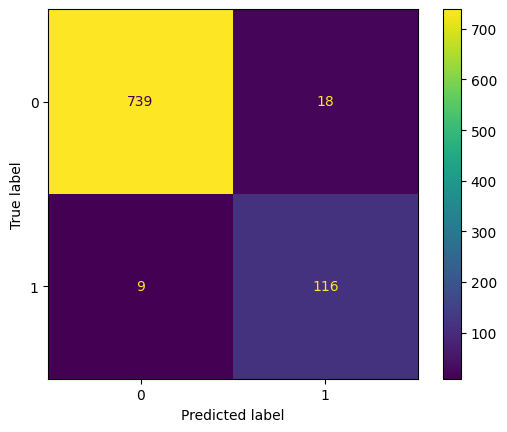


Reporte de Clasificación (Test):
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       757
           1       0.87      0.93      0.90       125

    accuracy                           0.97       882
   macro avg       0.93      0.95      0.94       882
weighted avg       0.97      0.97      0.97       882

Exactitud (Test): 0.97
Precisión (Test): 0.87
Recall (Test): 0.93
F1 Score (Test): 0.90


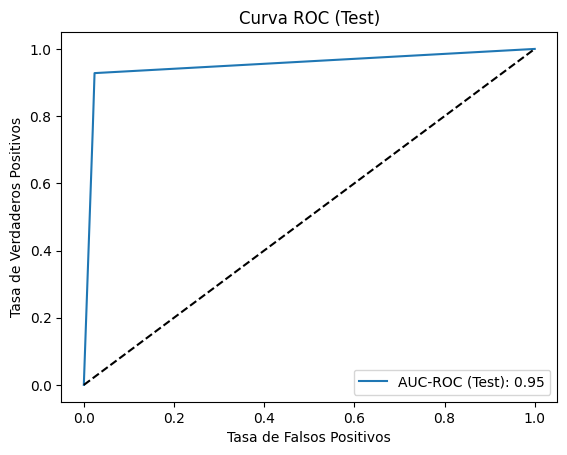


Reporte de Clasificación (Train):
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      3003
           1       0.91      1.00      0.95       525

    accuracy                           0.99      3528
   macro avg       0.96      0.99      0.97      3528
weighted avg       0.99      0.99      0.99      3528

Exactitud (Train): 0.99
Precisión (Train): 0.91
Recall (Train): 1.00
F1 Score (Train): 0.95
AUC-ROC (Train): 1.00

AUC-ROC (Test): 0.95
AUC-ROC (Train): 1.00
No hay indicios significativos de sobreajuste.


In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, StratifiedKFold
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Estandarizar las características de los conjuntos de entrenamiento y prueba
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definir el espacio de hiperparámetros para la búsqueda
param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 10],
    'criterion': ['gini', 'entropy']
}

# Crear el modelo de Árbol de Decisión con balanceo de clases
tree_model = DecisionTreeClassifier(random_state=42, class_weight='balanced')

# Configurar la validación cruzada estratificada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Configurar GridSearchCV
grid_search = GridSearchCV(
    estimator=tree_model,
    param_grid=param_grid,
    scoring='f1',
    cv=cv,
    n_jobs=-1,
    verbose=1
)

# Entrenar el modelo con GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Obtener el mejor modelo
best_tree_model = grid_search.best_estimator_
print(f"Mejores hiperparámetros: {grid_search.best_params_}")

# Predicciones en el conjunto de entrenamiento y prueba
y_train_pred_tree = best_tree_model.predict(X_train_scaled)
y_test_pred_tree = best_tree_model.predict(X_test_scaled)

# Probabilidades para el cálculo de AUC-ROC
y_train_prob_tree = best_tree_model.predict_proba(X_train_scaled)[:, 1]
y_test_prob_tree = best_tree_model.predict_proba(X_test_scaled)[:, 1]

# Matriz de confusión en el conjunto de prueba
print("Matriz de Confusión (Test):")
cm_test_tree = confusion_matrix(y_test, y_test_pred_tree)
disp_tree = ConfusionMatrixDisplay(confusion_matrix=cm_test_tree)
disp_tree.plot()
plt.show()

# Reporte de clasificación en el conjunto de prueba
print("\nReporte de Clasificación (Test):")
print(classification_report(y_test, y_test_pred_tree))

# Cálculo explícito de métricas en el conjunto de prueba
accuracy_test_tree = accuracy_score(y_test, y_test_pred_tree)
precision_test_tree = precision_score(y_test, y_test_pred_tree)
recall_test_tree = recall_score(y_test, y_test_pred_tree)
f1_test_tree = f1_score(y_test, y_test_pred_tree)
print(f"Exactitud (Test): {accuracy_test_tree:.2f}")
print(f"Precisión (Test): {precision_test_tree:.2f}")
print(f"Recall (Test): {recall_test_tree:.2f}")
print(f"F1 Score (Test): {f1_test_tree:.2f}")

# AUC-ROC en el conjunto de prueba
roc_auc_test_tree = roc_auc_score(y_test, y_test_prob_tree)
fpr_tree, tpr_tree, thresholds_tree = roc_curve(y_test, y_test_prob_tree)
plt.plot(fpr_tree, tpr_tree, label=f"AUC-ROC (Test): {roc_auc_test_tree:.2f}")
plt.plot([0, 1], [0, 1], 'k--')  # Línea diagonal
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC (Test)')
plt.legend()
plt.show()

# Reporte de clasificación en el conjunto de entrenamiento
print("\nReporte de Clasificación (Train):")
print(classification_report(y_train, y_train_pred_tree))

# Cálculo explícito de métricas en el conjunto de entrenamiento
accuracy_train_tree = accuracy_score(y_train, y_train_pred_tree)
precision_train_tree = precision_score(y_train, y_train_pred_tree)
recall_train_tree = recall_score(y_train, y_train_pred_tree)
f1_train_tree = f1_score(y_train, y_train_pred_tree)
print(f"Exactitud (Train): {accuracy_train_tree:.2f}")
print(f"Precisión (Train): {precision_train_tree:.2f}")
print(f"Recall (Train): {recall_train_tree:.2f}")
print(f"F1 Score (Train): {f1_train_tree:.2f}")

# AUC-ROC en el conjunto de entrenamiento
roc_auc_train_tree = roc_auc_score(y_train, y_train_prob_tree)
print(f"AUC-ROC (Train): {roc_auc_train_tree:.2f}")

# Evaluación de sobreajuste
print(f"\nAUC-ROC (Test): {roc_auc_test_tree:.2f}")
print(f"AUC-ROC (Train): {roc_auc_train_tree:.2f}")

if abs(roc_auc_train_tree - roc_auc_test_tree) > 0.05:
    print("Posible sobreajuste detectado.")
else:
    print("No hay indicios significativos de sobreajuste.")
